In [1]:
import pandas as pd

In [2]:
hate_speech = pd.read_csv('hate_speech.csv', index_col=0)
hate_speech = hate_speech.drop('spell_preprocessed_corpus_copy', 1) # 코드 수정후에는 copy와 기존 컬럼이 동일해서 필요없어짐

In [3]:
hate_speech.info() # pos할때 결측치 나옴 추후 체크

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7893 entries, 0 to 7895
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   title                            7893 non-null   object
 1   spell_preprocessed_corpus_title  7893 non-null   object
 2   pos_tagged_corpus_title          7893 non-null   object
 3   stemming_corpus_title            7893 non-null   object
 4   removed_stopword_corpus_title    7893 non-null   object
 5   comments                         7893 non-null   object
 6   cleaned_corpus                   7893 non-null   object
 7   basic_preprocessed_corpus        7893 non-null   object
 8   unicode_emoji_free_corpus        7893 non-null   object
 9   spell_preprocessed_corpus        7893 non-null   object
 10  pos_tagged_corpus                7886 non-null   object
 11  stemming_corpus                  7886 non-null   object
 12  removed_stopword_corpus          7

In [4]:
len(hate_speech['title'].drop_duplicates(keep='first')) # 기사 제목은 중복제거를 해보니 총 7893개 중 1477개 기사임

1477

In [16]:
hate_speech_tmp = hate_speech[['title','comments','label']] # 간단하게 보기 위해 원래 컬럼만 추출

In [17]:
hate_speech_tmp.groupby(['title', 'label']).count() # 대략 한 기사당 3~6개 정도의 코멘트를 가져온듯

comments
title                                              label              
"'프듀2' 출신 합류" 느와르 "롤모델 방탄소년단"(종합)                  none              1
                                                   offensive         5
"180cm 괴어 영접"'전설의 빅피쉬' 아마존 그랜드슬램 '대성공' (ft.뱀뱀)[종합] none              3
                                                   offensive         1
"19살차 극복"…정재용♥선아, 결혼 5개월만 득녀→행복한 인생 2막 [종합]        hate              2
...                                                                ...
휘성, 에이미 '프로포폴 공범' 지목…케이윌까지 '대략난감'[종합]              hate              1
                                                   none              1
                                                   offensive         2
휘성, 오늘 부친상 비보..28일 발인                              none              1
                                                   offensive         2

[3495 rows x 1 columns]

In [7]:
#  khaiii 형태소 분석에서 중요 품사 없어서 삭제된 코멘트들
#  여기 있는 문장의 품사들도 중요 품사에 추가 시켜야 할듯
hate_speech[hate_speech['pos_tagged_corpus'].isnull()][['comments', 'label']] 

,comments,label
53,290억 아니고?,none
1771,누구냐 넌,offensive
1773,누구냐 넌????,offensive
4360,얘 누군데,offensive
4367,얘가 누군데,offensive
5521,으 ;;;;;;;;;;,none
7327,토 ㆍㆍㆍㆍㆍㆍ,none


In [21]:
# 일단은 결측치 제거한 df로 작업

df = hate_speech[hate_speech['pos_tagged_corpus'].notnull()]

In [23]:
# 최종적으로 품사태깅 마친 removed_stopword_corpus 분리후 카운트 넣어보기

df['pos_corpus_split'] = df['removed_stopword_corpus'].str.split(' ')
df['pos_count'] = df['pos_corpus_split'].apply(lambda x: len(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
df['pos_corpus_split'][0], df['pos_count'][0]

(['현재/MAG',
  '호텔/NNG',
  '주인/NNG',
  '심정/NNG',
  '나/VA',
  '마른하늘/NNG',
  '벼락/MAG',
  '맞다/VV',
  '호텔/NNG',
  '망하다/VV',
  '생기다/VV',
  '계속/MAG',
  '추모/NNG',
  '받다/VV'],
 14)

<Figure size 1152x432 with 0 Axes>

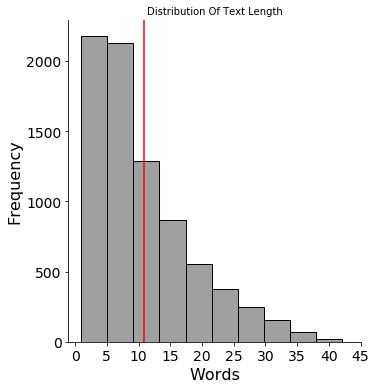

In [33]:
# Generating a list of text lengths
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


lengths = [len(text) for text in df['pos_corpus_split']]

# Plotting the text lengths

plt.figure(figsize=(16,6))
sns.displot(lengths, kde=False, bins=10, color="gray")
plt.axvline(np.mean(lengths), color = "red")
plt.title("Distribution Of Text Length", size= 10)
plt.xlabel("Words", size=16)
plt.ylabel("Frequency", size=16)
plt.xticks(np.arange(0,50,5), size=14)
plt.yticks(size=14);

# The red line marks the mean length

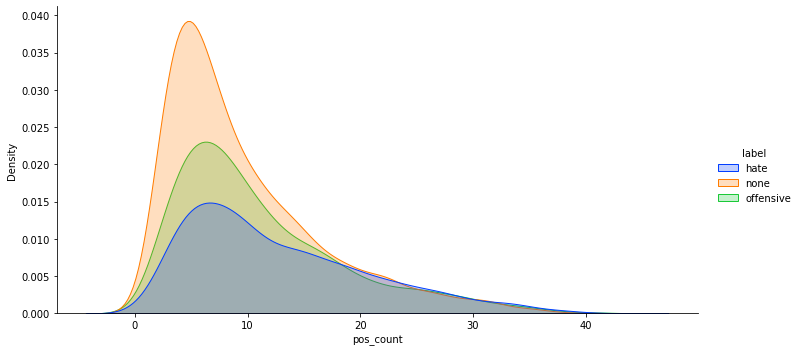

In [38]:
sns.displot(
    data=df, 
    x='pos_count', 
    hue='label', 
    kind='kde', 
    fill=True, 
    palette=sns.color_palette('bright')[:3], 
    height=5, aspect=2)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7886 entries, 0 to 7895
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   title                            7886 non-null   object
 1   spell_preprocessed_corpus_title  7886 non-null   object
 2   pos_tagged_corpus_title          7886 non-null   object
 3   stemming_corpus_title            7886 non-null   object
 4   removed_stopword_corpus_title    7886 non-null   object
 5   comments                         7886 non-null   object
 6   cleaned_corpus                   7886 non-null   object
 7   basic_preprocessed_corpus        7886 non-null   object
 8   unicode_emoji_free_corpus        7886 non-null   object
 9   spell_preprocessed_corpus        7886 non-null   object
 10  pos_tagged_corpus                7886 non-null   object
 11  stemming_corpus                  7886 non-null   object
 12  removed_stopword_corpus          7

In [89]:
from sklearn.naive_bayes             import MultinomialNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model            import LogisticRegression
from sklearn.model_selection         import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics                 import accuracy_score, recall_score, roc_auc_score, f1_score
from sklearn.pipeline                import Pipeline
from sklearn.svm                     import SVC
from sklearn.tree                    import DecisionTreeClassifier
from xgboost                         import XGBClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['code'] = LE.fit_transform(df['label'])

In [67]:
X = df['removed_stopword_corpus']
y = df['code']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 29,
                                                    stratify     = y)

In [61]:
# Setting up the pipeline

cvec_lr_pipe = Pipeline([("cvec", CountVectorizer()), 
                         ("log_reg", LogisticRegression())])

# Setting the CVEC hyperparameters

cvec_pipe_params = {"cvec__max_features": [125], 
                    "cvec__ngram_range" : [(1,2)], 
                    "cvec__stop_words"  : [None]}

# Instantiating the grid search

cvec_lr_gs = GridSearchCV(cvec_lr_pipe, 
                          param_grid = cvec_pipe_params, 
                          cv=5)

# Fitting the model to the training data

cvec_lr_gs.fit(X_train, y_train);

# The futurewarning can be ignored

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [68]:
# Generating training predictions

cvec_lr_train_preds = cvec_lr_gs.predict(X_train)

# Generating test predictions

cvec_lr_preds = cvec_lr_gs.predict(X_test)

# Generating test probabilities

cvec_lr_probas = cvec_lr_gs.predict_proba(X_test)

print('Train Acc : ', accuracy_score(y_train, cvec_lr_train_preds))
print('Test Acc : ', accuracy_score(y_test, cvec_lr_preds))

Train Acc :  0.5087190868738111
Test Acc :  0.49493029150823825


In [70]:
# Setting up the pipeline

tvec_lr_pipe = Pipeline([("tvec", TfidfVectorizer()), 
                         ("log_reg", LogisticRegression())])

# Setting TFIDF hyperparameters

tvec_pipe_params = {"tvec__max_features": [650], 
                    "tvec__ngram_range" : [(1,1)], 
                    "tvec__stop_words"  : [None]}
                    
# Instantiating the grid search

tvec_lr_gs = GridSearchCV(tvec_lr_pipe, 
                          param_grid = tvec_pipe_params, 
                          cv         = 5)

# Fitting the model to the training data

tvec_lr_gs.fit(X_train, y_train);

# The warning is a futurewarning and can be ignored

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [71]:
# Generating training predictions

tvec_lr_train_preds = tvec_lr_gs.predict(X_train)

# Generating test predictions

tvec_lr_preds       = tvec_lr_gs.predict(X_test) 

# Generating test probabilities

tvec_lr_probas     = tvec_lr_gs.predict(X_test)

In [72]:
print('Train Acc : ', accuracy_score(y_train, tvec_lr_train_preds))
print('Test Acc : ', accuracy_score(y_test, tvec_lr_preds))

Train Acc :  0.6276157260621433
Test Acc :  0.5583016476552598


In [73]:
# Support Vector Classifier

# Setting up the pipeline

cvec_svc_pipe = Pipeline([("cvec", CountVectorizer()), 
                         ("svc", SVC())])

# Setting CVEC and pipe hyperparameters

cvec_pipe_params = {"cvec__max_features": [319], 
                    "cvec__ngram_range" : [(1,2)], 
                    "cvec__stop_words"  : [None],
                    "svc__C"            : [1.0],
                    "svc__kernel"       : ["rbf"],
                    "svc__gamma"        : ["auto"]}
                    
# Instantiating the grid search

cvec_svc_gs = GridSearchCV(cvec_svc_pipe, 
                           param_grid = cvec_pipe_params, 
                           cv         = 5)

# Fitting the model to the training data

cvec_svc_gs.fit(X_train, y_train);

In [74]:

# Generating training predictions

cvec_svc_train_preds = cvec_svc_gs.predict(X_train)

# Generating test predictions

cvec_svc_preds       = cvec_svc_gs.predict(X_test)

In [75]:
print('Train Acc : ', accuracy_score(y_train, cvec_svc_train_preds))
print('Test Acc : ', accuracy_score(y_test, cvec_svc_preds))

Train Acc :  0.4950856055802156
Test Acc :  0.47338403041825095


In [76]:
# Setting up the pipeline

tvec_svc_pipe = Pipeline([("tvec", TfidfVectorizer()), 
                         ("svc", SVC())])

# Setting TFIDF and pipe hyperparameters

tvec_pipe_params = {"tvec__max_features": [1], 
                    "tvec__ngram_range" : [(1,1)], 
                    "tvec__stop_words"  : [None],
                    "svc__C"            : [1.0],
                    "svc__kernel"       : ["rbf"],
                    "svc__gamma"        : ["auto"]}
                    
# Instantiating the grid search

tvec_svc_gs = GridSearchCV(tvec_svc_pipe, 
                           param_grid = tvec_pipe_params, 
                           cv         = 5)

# Fitting the model to the training data

tvec_svc_gs.fit(X_train, y_train);

In [77]:
# Generating training predictions

tvec_svc_train_preds = tvec_svc_gs.predict(X_train)

# Generating test predictions

tvec_svc_preds       = tvec_svc_gs.predict(X_test)

In [78]:
# Creating the pipeline

cvec_rf_pipe = Pipeline([("cvec", CountVectorizer()), 
                         ("rf", RandomForestClassifier(random_state = 42))])

# Setting CVEC and pipeline hyperparameters

cvec_pipe_params = {"cvec__max_features"   : [1000], 
                    "cvec__ngram_range"    : [(1,1)], 
                    "cvec__stop_words"     : [None],
                    "rf__n_estimators"     : [72],
                    "rf__min_samples_split": [6],
                    "rf__min_samples_leaf" : [2],
                    "rf__max_depth"        : [20]}

# Instantiating the grid search

cvec_rf_gs = GridSearchCV(cvec_rf_pipe, 
                          param_grid = cvec_pipe_params, 
                          cv         = 5,
                          n_jobs     = 6)

# Fitting the model to the training data

cvec_rf_gs.fit(X_train, y_train);

In [79]:
# Generating training predictions

cvec_rf_train_preds = cvec_rf_gs.predict(X_train)

# Generating test predictions

cvec_rf_preds       = cvec_rf_gs.predict(X_test) 

# Generating test probabilities

cvec_rf_probas      = cvec_rf_gs.predict_proba(X_test)

In [80]:
# Creating the pipeline

tvec_rf_pipe = Pipeline([("tvec", TfidfVectorizer()), 
                         ("rf", RandomForestClassifier(random_state = 42))])

# Setting the TVEC and pipeline hyperparameters

tvec_pipe_params = {"tvec__max_features"   : [250], 
                    "tvec__ngram_range"    : [(1,2)], 
                    "tvec__stop_words"     : [None],
                    "rf__n_estimators"     : [30],
                    "rf__min_samples_split": [6],
                    "rf__min_samples_leaf" : [2],
                    "rf__max_depth"        : [12]}

# Instantiating the grid search

tvec_rf_gs = GridSearchCV(tvec_rf_pipe, 
                          param_grid = tvec_pipe_params, 
                          cv         = 5,
                          n_jobs     = 6)

# Fitting the model to the testing data

tvec_rf_gs.fit(X_train, y_train);

In [81]:
# Generating training predictions

tvec_rf_train_preds = tvec_rf_gs.predict(X_train)

# Generating test predictions

tvec_rf_preds       = tvec_rf_gs.predict(X_test) 

# Generating test probabilities

tvec_rf_probas      = tvec_rf_gs.predict_proba(X_test)

In [82]:
# Creating the pipeline
# The model's best parameters are shown

cvec_xgbc_pipe = Pipeline([("cvec", CountVectorizer()), 
                           ("xgbc", XGBClassifier(n_jobs                = 6,
                                                  seed                  = 42,
                                                  early_stopping_rounds = 10))])

# Setting CVEC and pipeline hyperparameters

cvec_pipe_params = {"cvec__max_features"   : [200], 
                    "cvec__ngram_range"    : [(1,3)], 
                    "cvec__stop_words"     : [None],
                    "xgbc__max_depth"      : [3],
                    "xgbc__learning_rate"  : [0.04],
                    "xgbc__n_estimators"   : [175],
                    "xgbc__gamma"          : [3.0]}

# Instantiating the grid search

cvec_xgbc_gs = GridSearchCV(cvec_xgbc_pipe, 
                            param_grid = cvec_pipe_params, 
                            cv         = 5,
                            n_jobs     = 6)

# Fitting the model to the testing data

cvec_xgbc_gs.fit(X_train, y_train);

[07:39:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [83]:
# Generating training predictions

cvec_xgbc_train_preds = cvec_xgbc_gs.predict(X_train)

# Generating test predictions

cvec_xgbc_preds       = cvec_xgbc_gs.predict(X_test) 

# Generating test probabilities

cvec_xgbc_probas      = cvec_xgbc_gs.predict_proba(X_test)

In [85]:
# Creating the pipeline
# The model's best parameters are shown

tvec_xgbc_pipe = Pipeline([("tvec", TfidfVectorizer()), 
                           ("xgbc", XGBClassifier(n_jobs                = 6,
                                                  seed                  = 42,
                                                  early_stopping_rounds = 10))])

# Setting the TFIDF and pipeline hyperparameters

tvec_pipe_params = {"tvec__max_features"   : [525], 
                    "tvec__ngram_range"    : [(1,3)], 
                    "tvec__stop_words"     : [None],
                    "xgbc__max_depth"      : [3],
                    "xgbc__learning_rate"  : [0.25],
                    "xgbc__n_estimators"   : [139],
                    "xgbc__gamma"          : [1.0]}

# Instantiating the grid search

tvec_xgbc_gs = GridSearchCV(tvec_xgbc_pipe, 
                            param_grid = tvec_pipe_params, 
                            cv         = 5,
                            n_jobs     = 6)

# Fitting the model to the testing data

tvec_xgbc_gs.fit(X_train, y_train);

[07:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [86]:
# Generating training predictions

tvec_xgbc_train_preds = tvec_xgbc_gs.predict(X_train)

# Generating test predictions

tvec_xgbc_preds       = tvec_xgbc_gs.predict(X_test) 

# Generating test probabilities

tvec_xgbc_probas      = tvec_xgbc_gs.predict_proba(X_test)

In [87]:
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style="display:inline"'), raw = True)

In [106]:
# Count vectorizer metrics

cvec_accuracy          = [accuracy_score(y_test, cvec_lr_preds), 
                          accuracy_score(y_test, cvec_svc_preds),
                          accuracy_score(y_test, cvec_rf_preds), 
                          accuracy_score(y_test, cvec_xgbc_preds)]

cvec_f1                = [f1_score(y_test, cvec_lr_preds, average='micro'), 
                          f1_score(y_test, cvec_svc_preds, average='micro'),
                          f1_score(y_test, cvec_rf_preds, average='micro'), 
                          f1_score(y_test, cvec_xgbc_preds, average='micro')]


# cvec_rocauc_score      = [roc_auc_score(y_test, cvec_lr_preds),
#                           roc_auc_score(y_test, cvec_svc_preds),
#                           roc_auc_score(y_test, cvec_rf_preds),
#                           roc_auc_score(y_test, cvec_xgbc_preds)]

# TFIDF vectorizer metrics

tvec_accuracy          = [accuracy_score(y_test, tvec_lr_preds), 
                          accuracy_score(y_test, tvec_svc_preds),
                          accuracy_score(y_test, tvec_rf_preds), 
                          accuracy_score(y_test, tvec_xgbc_preds)]

tvec_f1                = [f1_score(y_test, tvec_lr_preds, average='micro'), 
                          f1_score(y_test, tvec_svc_preds, average='micro'),
                          f1_score(y_test, tvec_rf_preds, average='micro'), 
                          f1_score(y_test, tvec_xgbc_preds, average='micro')]

# tvec_rocauc_score      = [roc_auc_score(y_test, tvec_lr_preds),
#                           roc_auc_score(y_test, tvec_svc_preds),
#                           roc_auc_score(y_test, tvec_rf_preds),
#                           roc_auc_score(y_test, tvec_xgbc_preds)]

In [111]:
cvec_scores = pd.DataFrame(data    = [cvec_f1],
                           
                           columns = ["CVEC_Log. Reg.", "CVEC_SVC", "CVEC_Random Forest", "CVEC_XGBoost"],
                           index   = ["F1-Score"])

# A dataframe for the TVEC scores

tvec_scores = pd.DataFrame(data    = [tvec_f1],
                           columns = ["TVEC_Log. Reg.", "TVEC_SVC", "TVEC_Random Forest", "TVEC_XGBoost"],
                           index   = [ "F1-Score"])

In [112]:
from IPython.display import display_html
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [113]:
# Displaying the two dataframes side by side

display_side_by_side(cvec_scores,
                     tvec_scores)

# The first table is the CVEC scores
# The second table is the TVEC scores

,CVEC_Log. Reg.,CVEC_SVC,CVEC_Random Forest,CVEC_XGBoost
F1-Score,0.49493,0.473384,0.498733,0.486058
,TVEC_Log. Reg.,TVEC_SVC,TVEC_Random Forest,TVEC_XGBoost
F1-Score,0.558302,0.441698,0.483523,0.489861


In [114]:
models = {'CVEC_Random Forest':cvec_rf_gs, 'TVEC_Log. Reg':tvec_lr_gs}

ValueError: multiclass format is not supported

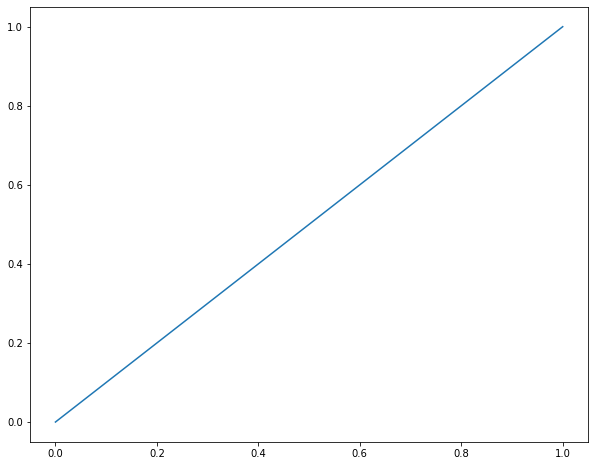

In [115]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)
    
plt.grid()
plt.legend()
plt.show()